In [18]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats.distributions import norm

%matplotlib inline

Для примера работы центральной предельный теоремы далее ЦПТ сгенерируем "генеральную совокупность"

(array([  18.,  129.,  617., 1838., 2894., 2657., 1387.,  388.,   64.,
           8.]),
 array([-8.57126291, -4.72887142, -0.88647993,  2.95591156,  6.79830306,
        10.64069455, 14.48308604, 18.32547754, 22.16786903, 26.01026052,
        29.85265201]),
 <BarContainer object of 10 artists>)

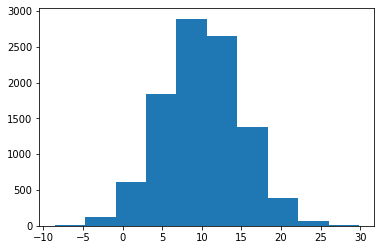

In [46]:
dist = norm(10, 5).rvs(10000)
plt.hist(dist, 10)

Давайте посчитаем вручную характеристики нашей генеральной совокупности

In [47]:
print("Среднее значение")
print(np.mean(dist))
print("Стандартное отклонение")
print(np.std(dist))

Среднее значение
10.02418835135195
Стандартное отклонение
4.96648341738928


Теперь мы априорно знаем статистики (характеристики) нашей генеральной совокупности.  
Теперь рассмотрим как работает ЦПТ.  
Выберем пару различных выборок разного объема из нашей генеральной совокупности.  
Построим распределение выборочных средних.  

In [69]:
def get_samples(samples_count=3, samples_size=10):
    samples = []
    for i in range(samples_count):
        samples.append(np.random.choice(dist, samples_size))
    return np.mean(samples, axis=1)

In [71]:
mean_dist = get_samples(1, 1)
print("Среднее по выборочному среднему:")
print(np.std(mean_dist))

Среднее по выборочному среднему:
0.0


Как видим, значение не очень точное, однако ЦПТ всё-таки предельная теорема, поэтому при увелечении объема выборки и их количества можно заметиить существенное уточнение

In [79]:
for i in range(1, 100):
    temp_mean = get_samples(i, i)
    print(np.mean(temp_mean))

17.46522290207506
10.501223046588395
10.737150511706794
8.609654222067393
10.659540705699147
8.36769788534722
10.71915835008932
10.512686136084739
10.784206738862181
10.226094663238161
10.073700309538397
9.51565339932784
10.285605633242788
10.096251986517448
10.596207429567
9.542016106450237
10.252398277811569
9.92017826367203
9.193849968585003
10.128370369582608
9.66903671207813
10.018054523835042
9.890546442879227
9.91933510566717
9.915220313612013
9.961604955466715
9.555369806480899
10.174664938909192
10.363334690044693
9.993599219743425
10.043298550521698
10.104497377334141
9.734089491862514
9.951470317132731
10.142367169203832
10.034650585262078
10.000466735471221
10.181135591413025
10.124327138017176
9.959220773355721
10.289785672784097
9.88654052080134
10.220547753015358
10.148138228393258
10.192911475084761
9.98958327845109
10.024073431921112
9.896457883623825
9.966071990909986
9.90720847770172
10.204099604416996
10.063744626022563
10.012776920322343
10.02300701283979
10.022201

Действительно ЦПТ работает! Выборочное среднее стремится к среднему генеральной совокупности